# Hypothesis Testing

#### Authors:
v1.0 (Spring 2020) Justin Hong, Christina Zhang, Kannan Ramchandran

## Q1. Introduction: a continuous example

Imagine we have a security camera that outputs a signal — some number $X$. We know that when all is well, the signal will be distributed as standard normal: $X \sim N(0, 1)$. But if there is an intruder, then the distribution of the signal is shifted, and $X \sim N(2, 1)$. When we read the signal from the camera, we would like to determine if all is well, or if there is an intruder. If there is an intruder, we would like to correctly determine so. At the same time, we would like to avoid rushing home if there was no intruder after all. 

This is an example of a binary hypothesis testing problem. There are two possible hypotheses. The first is that all is well. We can call this $H_0$, the **null hypothesis**. After observing $X$, we can **accept** the null hypothesis, or we can **reject** the null hypothesis in favor of the other hypothesis, $H_1$ — that there is an intruder.

We can write a rule for accepting or rejecting the null hypothesis by determining an **acceptance region**. This will be all values of $X$ for which we accept the null hypothesis. An arbitrary example of this could be saying if $X \in \{3\} \bigcup [6, 9]$, accept that there is no intruder. 

After we've set an acceptance region, it is possible to raise a false alarm (incorrectly reject the null hypothesis). For example, it is possible that $X \sim N(0, 1)$, meaning all is well, and $X = 4$, which is outside of the acceptance region. In this case our rule would say that there is an intruder when there is not. The conditional probability of making this type of error is called the **probability of false alarm** (PFA) and is denoted $\alpha$. 

$$\text{PFA} = \alpha = \mathcal{P}(\text{choosing } H_1 | H_0)$$

On the other hand, it could be that there is an intruder, and we detect it correctly (for example,  $X \sim N(2, 1)$ and $X = 4$). The probability of this is the **probability of correct detection** (PCD).

$$\text{PCD} = \mathcal{P}(\text{choosing } H_1 | H_1)$$

We would like to maximize PCD while staying under a limit on PFA. We'll see that there is a tradeoff between these two values. 

For now, let's take a look at the PDFs of $X$ in each case: 

In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

import scipy.stats
import math

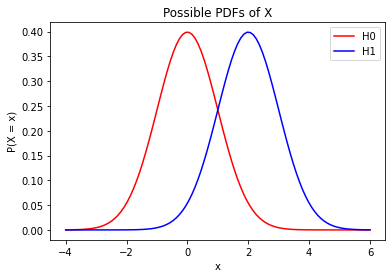

In [2]:
mu0 = 0
mu1 = 2
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1 - 5*sigma, 1 + 5*sigma, 100)
y0 = scipy.stats.norm.pdf(x, mu0, sigma)
y1 = scipy.stats.norm.pdf(x, mu1, sigma)
fig, (ax1) = plt.subplots(1, 1, sharex=True)

ax1.set_title('Possible PDFs of X')
ax1.plot(x, y0, color='red', label='H0')
ax1.plot(x, y1, color='blue', label='H1')
ax1.set_xlabel('x')
ax1.set_ylabel('P(X = x)')
ax1.legend()

## Likelihood Ratio

Looking at the graph above, we have some feeling that if we observe $X < 1$, $H_0$ is more likely, and if we observe $X > 1$, $H_1$ is more likely.

Why is this? You may be comparing the conditional probabilities $f_{X|H_1}(x)$ and $f_{X|H_0}(x)$. When $X < 1$, $f_{X|H_0}(x) > f_{X|H_1}(x)$, and when $X > 1$, $f_{X|H_0}(x) < f_{X|H_1}(x)$.
Define the **likelihood ratio** as the ratio of these two values. 

$$ L(x) := \frac{f_{H_1}(x)}{f_{H_0}(x)} $$

Plot the likelihood ratio as a function of $x$ (Note: if plt is not working, try stopping the interactive plots from before):

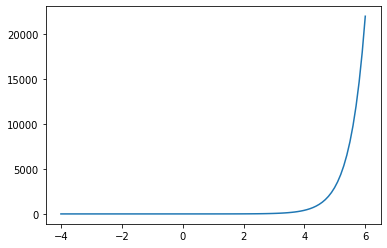

In [3]:
# BEGIN YOUR SOLUTION
plt.plot(x, y1/y0)
# END YOUR SOLUTION

Notice that the likelihood ratio is mononotonically increasing. Neyman-Pearson says that when this is the case, the acceptance region is something like this: 

1. Accept $H_0$ if $X < c$

2. Reject $H_0$ if $X > c$

(Because $X$ is continuous, we don't consider $X = c$ here. But that case is important for discrete RVs, as we will see in the next example.)

Because the likelihood ratio is monotonically increasing, we can be confident that there's not some high value of $X$, say $c'>c$, beyond which we would change our minds and accept $H_0$ again. In other words, we know that there exists some threshold $c$ for $X$ below which we always accept, and above which we always reject the null hypothesis. 

## The Neyman-Pearson Test 

Let's visualize the acceptance and rejection regions derived from the Neyman-Pearson test. When our likelihood ratio is monotonic, we know the 'optimal' test is a simple threshold decision rule. 

Calculate the threshold and the PCD for the hypotheses described above. (Hint: Look up norm.cdf and norm.ppf from scipy.stats)

Play around with the value of $\alpha$ and look at the visualization. The x values of the shaded region indicate what values of $X$ we should reject the null hypothesis. The area of the shaded region is the probability of false alarm. How are PFA and PCD related to each other? 

In [4]:
from scipy.stats import norm

# Returns the NP threshold for the continuous example above for a given significance level alpha.
def get_threshold(alpha):
    ### BEGIN SOLUTION
    threshold = norm.ppf(1 - alpha)
    ### END SOLUTION 
    return threshold

# Returns the probability of correct detection for the continuous example above
# given a threshold (for a decision rule).
def get_pcd(threshold):
    ### BEGIN SOLUTION
    pcd = 1 - norm.cdf(threshold - 2) 
    ### END SOLUTION 
    return pcd

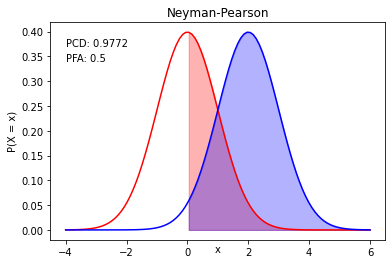

In [14]:
mu0 = 0
mu1 = 2
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1 - 5*sigma, 1 + 5*sigma, 100)
y0 = scipy.stats.norm.pdf(x, mu0, sigma)
y1 = scipy.stats.norm.pdf(x, mu1, sigma)

fig, (ax1) = plt.subplots(1)

ax1.set_title('Neyman-Pearson')
ax1.plot(x, y0, color='red', label='H0')
ax1.plot(x, y1, color='blue', label='H1')
ax1.set_xlabel('x')
ax1.xaxis.set_label_coords(0.5, -0.02)
ax1.set_ylabel('P(X = x)')
pcd_text = plt.text(-4, 0.37, 'PCD: ')
pfa_text = plt.text(-4, 0.34, 'PFA: ')

#@interact(alpha=0.0)
def update_figure(alpha):
    threshold = get_threshold(alpha)                            
    ax1.fill_between(x, 0, y0, where=([True]*100), color='white', alpha=1)
    ax1.fill_between(x, 0, y1, where=([True]*100), color='white', alpha=1)
    ax1.fill_between(x, 0, y0, where=(x>threshold), color='red', alpha=0.3)
    ax1.fill_between(x, 0, y1, where=(x>threshold), color='blue', alpha=0.3)
    pcd = get_pcd(threshold)
    pcd_text.set_text('PCD: {}'.format(np.around(pcd, decimals=4)))
    pfa_text.set_text('PFA: {}'.format(np.around(alpha, decimals=4)))

alpha = 0.5
update_figure(alpha=alpha)
plt.show()


### Question: 
Play around with the significance level (alpha) slider. How does PFA change with significance level? How does PCD change with significance level?

significance level++ => PFA++, PCD++

### Question: 
How would the acceptance region look if we had a monotonically decreasing likelihood ratio rather than a monotonically increasing one?

The acceptance region would start from a threshold to infinity.

## A discrete example

Now, let's consider a discrete example. 

We observe $X \sim Bin(n,p)$, and wish to test $H_0: p=p_0$ vs $H_1: p=p_1$, with $p_0 < p_1$.

Implement the Neyman-Pearson test for discrete distributions. Run the cells to see a discrete visualization. Note: when the bars are partially filled in the visualization, this indicates we randomize our decision when we observe that value of $X$.

In [15]:
# Constants.
n = 10
p0 = 0.4
p1 = 0.6

bar_width=0.3
display_num_decimals=3

In [16]:
probs0 = scipy.stats.binom.pmf(np.arange(n+1), n, p0)
probs1 = scipy.stats.binom.pmf(np.arange(n+1), n, p1)   

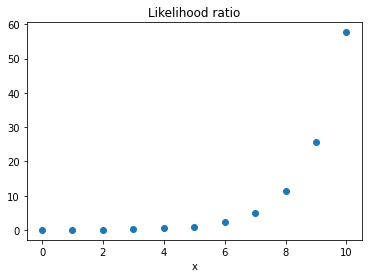

In [17]:
fig, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.set_title('Likelihood ratio')
ax1.set_xlabel('x')
ax1.scatter(range(11), [probs1[i]/probs0[i] for i in range(11)])

In [20]:
def simple_threshold_test_dist(alpha, probs0):
    """Returns a function which, given input data x, returns the
    rejection probability for the level alpha simple threshold test
    based on the probability distribution described by probs0.
    E.g. If you deterministically reject for a given observation x,
    test(x) should output 1. """

    # CCDF w/ equality (Defined as CCDF_w_eq(x) = P(X >= x)) under the null hypothesis.
    ccdf_w_eq = np.cumsum(probs0[::-1])[::-1]
    # For numerical imprecision issues.
    ccdf_w_eq[0] = 1.0
    # Find the first index from the right where the tail probability is >= alpha.
    threshold = len(ccdf_w_eq) - 1 - np.argmax(ccdf_w_eq[::-1] >= alpha)
    
    def test(x):
        ### BEGIN SOLUTION
        if x < threshold:
            return 0
        elif x > threshold:
            return 1
        else:
            if threshold == len(ccdf_w_eq) - 1:
                return alpha / probs0[threshold]
            else:
                return (alpha - ccdf_w_eq[threshold + 1]) / probs0[threshold]
        ### END SOLUTION
    return test

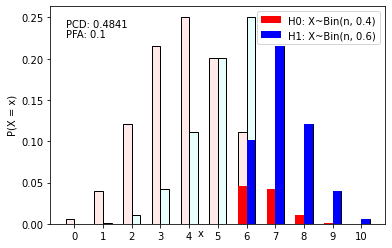

In [25]:
# Bars for binomial probabilities.
fig, (ax1) = plt.subplots(1)

background_bars0 = ax1.bar(np.arange(n+1) - bar_width / 2, probs0, 
                           bar_width, color= '#FFE9E9', edgecolor = 'black')
background_bars1 = ax1.bar(np.arange(n+1) + bar_width / 2, probs1, 
                           bar_width, color= '#E9FFFE', edgecolor = 'black')
bars0 = ax1.bar(np.arange(n+1) - bar_width / 2, 0.0, bar_width, color = 'red',
                label='H0: X~Bin(n, 0.4)')
bars1 = ax1.bar(np.arange(n+1) + bar_width / 2, 0.0, bar_width, color = 'blue', linestyle='-',
                label='H1: X~Bin(n, 0.6)')
ax1.set_xticks(np.arange(11))
height = max(max(probs0), max(probs1))
pcd_text = ax1.text(-0.3, height * 0.95, 'PCD: ')
pfa_text = ax1.text(-0.3, height * 0.9, 'PFA: ')
ax1.legend()
ax1.set_xlabel('x')
ax1.xaxis.set_label_coords(0.45, -0.02)
ax1.set_ylabel('P(X = x)')

alpha=0.1

test = simple_threshold_test_dist(alpha, probs0)

rejection_probs = [test(i) for i in range(n+1)]
# List of PCD, given each possible data value.
pcd = [probs1[i] * rejection_probs[i] for i in range(n+1)]
# List of PFA, given each possible data value.
pfa = [probs0[i] * rejection_probs[i] for i in range(n+1)]

# Updates total PCD and PFA.
pcd_text.set_text('PCD: {}'.format(np.around(sum(pcd), decimals=4)))
pfa_text.set_text('PFA: {}'.format(np.around(sum(pfa), decimals=4)))

# Updates the bars.
for i in range(n+1):
    bars0[i].set_height(rejection_probs[i] * probs0[i])
    bars1[i].set_height(rejection_probs[i] * probs1[i])
plt.show()


## Conceptual Questions

### Question:

What is the probability that $X = 6$ given $H_0$? $H_1$? Compare $\mathcal{P}{(X=6|H_1)}$ and $\mathcal{P}{(X=6|H_0)}$. In what case would we choose to accept the hypothesis corresponding to the lesser of these values?

When significance level is small.

### Question:

Play around with the significance level (alpha) slider. What is the best PCD value you can find for $\alpha \le 0.10$?

0.484

### Question:
Suppose we want the probability of false alarm to be no more than 0.1, and we observe $X$ to be 5. Which parameter, $p_0$ or $p_1$, would we ascribe to our model?


In [26]:
test = simple_threshold_test_dist(0.1, probs0)
test(5)

0

p0

### Question:
Note that when the significance level is 0.1, and we observe $X$ to be 6, whether we reject the null hypothesis is not determinate. Suppose we eschew this and decide to set the probability to either 0 or 1. In each case, what do we violate about the Neyman Pearson guarantees?


If we set the probability to 1: the PFA will exceed alpha

If we set the probability to 0: PCD is not optimal

### Question:
Consider the distribution assumed by $H_0$. Notice that under $H_0$, the probability that $X=10$ is extremely small. Why do we accept the null hypothesis when the significance level is 0? 

Because we have no tolerance for false alarm, so we have to always accept the null hypothesis.

## Q2. Deriving the optimal acceptance region 

Recall the likelihood ratio: probability of the observation given H1 / probability of the observation given H0. Let us forget about Neyman-Pearson for a moment. Intuitively, we should reject the null hypothesis when the likelihood ratio is large, and accept it when it is small. Part of the formulation of the hypothesis testing problem is that we want to maximize the probability of correct detection, i.e. reject the null hypothesis when it is false. However, we cannot always reject the null hypothesis, because rejecting the null hypothesis when it is correct is a false alarm. 

Write code that will greedily choose where to reject based on the highest likelihood ratios, so that the PCD is maximized while PFA $\leq \alpha$.

In [27]:
outcomes = list(range(11))
H1_probs = probs1 # H1_probs[i] = Probability under H1 [X = i]
H0_probs = probs0 # H0_probs[i] = Probability under H0 [X = i]

# Find the likelihood ratio for each outcome and sort the outcomes by decreasing likelihood ratio 
def get_sorted_outcomes(H1_probs, H0_probs):
    sorted_outcomes = None
    ### BEGIN YOUR SOLUTION ###
    ratios = [H1_probs[i]/H0_probs[i] for i in range(len(H1_probs))]
    sorted_outcomes = sorted(outcomes, key=lambda i: -ratios[i])
    ### END YOUR SOLUTION ###
    return sorted_outcomes

sorted_outcomes = get_sorted_outcomes(H1_probs, H0_probs)
print(sorted_outcomes)

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [28]:
# Return rej_probs, where rej_probs[i] is the probability we reject the null when we observe i as the outcome
# under a Neyman-Pearson rule with significance level alpha
def get_rejection_probabilities(alpha, sorted_outcomes, H0_probs):
    # Find the rejection rule 
    rej_probs = [0]*11
    pfa_so_far = 0
    
    ### BEGIN YOUR SOLUTION ###
    i = 0
    while pfa_so_far < alpha:
        curr_outcome = sorted_outcomes[i]
        outcome_pfa = H0_probs[curr_outcome]
        if pfa_so_far + outcome_pfa > alpha:
            rej_probs[curr_outcome] = (alpha - pfa_so_far) / outcome_pfa
            break
        rej_probs[curr_outcome] = 1
        pfa_so_far += outcome_pfa
        i += 1

    ### END YOUR SOLUTION ###
    return rej_probs

alpha = 0.10
rej_probs = get_rejection_probabilities(alpha, sorted_outcomes, H0_probs)
print(rej_probs)
        

[0, 0, 0, 0, 0, 0, 0.4058077050264548, 1, 1, 1, 1]


In [30]:
# Returns the probability of correct detection for the Neyman-Pearson rule with significance level alpha
def get_pcd_greedy(rej_probs, H1_probs):
    ### BEGIN YOUR SOLUTION ###
    return sum([rej_probs[i]*H1_probs[i] for i in range(len(sorted_outcomes))])
    ### END YOUR SOLUTION ###
print(get_pcd_greedy(rej_probs, H1_probs))

0.48406636799999964


### Question

How does your greedy algorithm's result compare with the likelihood ratio test?

the same

## A bimodal example

Let's take a look at a case where the simple threshold test is not optimal.

In this case, $X$ will be one of two mixtures of binomials. See the likelihood ratio and PDFs plotted below. Note that in the visualization, we reject from right to left, but this is not the best test.

In [31]:
# Bimodal 
helper0 = scipy.stats.binom.pmf(np.arange(n+1), n, .1)
helper1 = scipy.stats.binom.pmf(np.arange(n+1), n, .7) 
helper2 = scipy.stats.binom.pmf(np.arange(n+1), n, .3)
helper3 = scipy.stats.binom.pmf(np.arange(n+1), n, .9) 
probsbi0 = (helper0 + helper1)/2
probsbi1 = (helper2 + helper3)/2

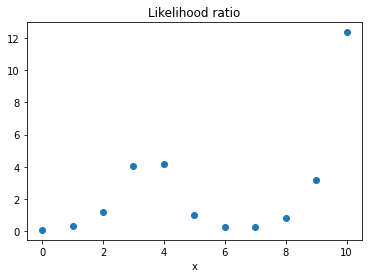

In [32]:
fig, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.set_title('Likelihood ratio')
ax1.set_xlabel('x')
ax1.scatter(range(11), [probsbi1[i]/probsbi0[i] for i in range(11)])

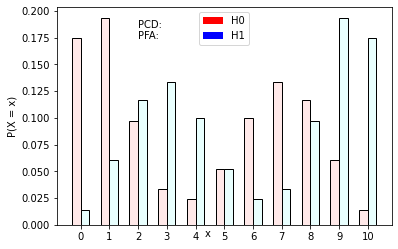

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

In [33]:
fig, (ax2) = plt.subplots(1)
background_bars0 = ax2.bar(np.arange(n+1) - bar_width / 2, probsbi0, 
                           bar_width, color= '#FFE9E9', edgecolor = 'black')
background_bars1 = ax2.bar(np.arange(n+1) + bar_width / 2, probsbi1, 
                           bar_width, color= '#E9FFFE', edgecolor = 'black')
bars0 = ax2.bar(np.arange(n+1) - bar_width / 2, 0.0, bar_width, color = 'red',
                label='H0')
bars1 = ax2.bar(np.arange(n+1) + bar_width / 2, 0.0, bar_width, color = 'blue', linestyle='-',
                label='H1')
ax2.set_xticks(np.arange(11))
height = max(max(probsbi0), max(probsbi1))
pcd_text = ax2.text(2, height * 0.95, 'PCD: ')
pfa_text = ax2.text(2, height * 0.9, 'PFA: ')
ax2.legend()
ax2.set_xlabel('x')
ax2.xaxis.set_label_coords(0.45, -0.02)
ax2.set_ylabel('P(X = x)')

plt.show()

@interact(alpha=0.0)
def update_figure(alpha):
    test = simple_threshold_test_dist(alpha, probsbi0)
    
    rejection_probs = [test(i) for i in range(n+1)]
    
    # List of PCD, given each possible data value.
    pcd = [probsbi1[i] * rejection_probs[i] for i in range(n+1)]
    # List of PFA, given each possible data value.
    pfa = [probsbi0[i] * rejection_probs[i] for i in range(n+1)]
    
    # Updates total PCD and PFA.
    pcd_text.set_text('PCD: {}'.format(np.around(sum(pcd), decimals=2)))
    pfa_text.set_text('PFA: {}'.format(np.around(sum(pfa), decimals=2)))

    # Updates the bars.
    for i in range(n+1):
        bars0[i].set_height(rejection_probs[i] * probsbi0[i])
        bars1[i].set_height(rejection_probs[i] * probsbi1[i])
    fig.canvas.draw_idle()


Run the next three cells which use your greedy algorithm to determine the acceptance and rejection regions. How do the rejection probabilities and PCD compare to accepting from right to left? What makes this example different from the last example?

In [34]:
sorted_outcomes = get_sorted_outcomes(probsbi1, probsbi0)
print(sorted_outcomes)

[10, 4, 3, 9, 2, 5, 8, 1, 7, 6, 0]


In [35]:
alpha = 0.1
rej_probs = get_rejection_probabilities(alpha, sorted_outcomes, probsbi0)
print(rej_probs)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0.4744555691547789, 1]


In [36]:
# Calculate the PCD 
print(get_pcd_greedy(rej_probs, probsbi1))

0.49982946728674565


### Question:
Using the slider above, what is the best PCD you can find for PFA $\le \alpha$ assuming a threshold decision rule?

0.39

### Question:
Compute the PCD using the greedy strategy. How does this compare to the the threshold rule?

0.499, which is better than the simple thresh hold decision rule.

## (Optional) Q3. Confidence Intervals

In this course, we have learned so far how to create a 95% confidence interval for the Gaussian distribution given an observation or a batch of observations. However, for other distributions, the answer is unclear. In this section, we explore the method of 'inverting' a hypothesis test to find a confidence interval for an arbitrary distribution.

By definition, a 95% confidence interval is an interval for which the true parameter, $\theta$, is contained within the interval with probability 95%. Suppose for some fixed $\theta_0 \in \Theta$ we construct a hypothesis test, $H_0: \theta = \theta_0$ and $H_1: \theta \neq \theta_0$. If we find the set, 

$$C(X) = \{ \theta_0: \text{the test for }H_0: \theta = \theta_0 \text{ is accepted under PFA constraint }\alpha \}$$

then we will have found a $(1-\alpha)$-level confidence interval/set!

So far, we have mostly covered one-sided hypothesis tests using Neyman-Pearson. For the sake of reproducing results you have seen before, you may assume that a symmetrical two-tailed decision rule (e.g. For $X\sim N(0,1)$, accept for $X\in [-0.5, 0.5]$) is the optimal for the symmetrical distributions we will be working with (Gaussian and Binomial with $p=1/2$).

## Computing the confidence interval for a Gaussian

Let $X\sim N(\theta, 1)$ and we observe $X = 2$. Let's first implement the hypothesis test for $X$ given some fixed $\theta_0$ and an observation $X=x$.

In [51]:
# Return a tuple containing the decision of the hypothesis test and the p-value associated with the observation.
def gaussian_hypo_test(theta0, x, alpha):
    r, p_val = 0, 0
    ### BEGIN YOUR SOLUTION ###
    p_val = 2*scipy.stats.norm.cdf(-abs(x - theta0), 0, 1)
    r = 1 if p_val < alpha else 0
    ### END YOUR SOLUTION ###
    return r, p_val

In [52]:
# Sanity Check: should return (0, 1)
gaussian_hypo_test(2, 2, 0.05)

(0, 1.0)

To invert the test, we need to run this hypothesis test on all possible values of $\theta_0 \in \Theta$, which is impossible since $\Theta = \mathbb{R}$. One method is to take an initial guess, then take discrete steps until we find the whole interval. Let us try to implement that below.

In [69]:
# Try intializing with an underestimate, ensuring that we begin with a rejection (outside of the interval)
# then stepping in the positive direction.
def compute_gaussian_CI(x, alpha, init_guess, step=0.01):
    assert alpha != 0 and init_guess < x and gaussian_hypo_test(init_guess, x, alpha)[0] == 1, "Must start with an underestimate"
    conf_interval_start = None
    conf_interval_end = None
    theta0 = init_guess
    
    ### BEGIN YOUR SOLUTION ###
    while gaussian_hypo_test(theta0, x, alpha)[0] == 1:
        theta0 += step
    conf_interval_start = theta0
    while gaussian_hypo_test(theta0, x, alpha)[0] == 0:
        theta0 += step
    conf_interval_end = theta0
    ### END YOUR SOLUTION ###
    
    conf_interval = (conf_interval_start, conf_interval_end)
    return conf_interval

In [70]:
print("95% confidence interval for theta is: {}".format(compute_gaussian_CI(2, 0.05, 0)))

95% confidence interval for theta is: (0.05, 3.9599999999999596)


However, for this example, the confidence interval is a contiguous interval where the boundaries are where the p-value meets $\alpha$ with equality. We can use this to find the confidence interval more accurately and much faster. (Hint: use the inverse CDF of the Gaussian)

In [71]:
def compute_gaussian_CI_alt(x, alpha):
    ### BEGIN YOUR SOLUTION ###
    return (x + scipy.stats.norm.ppf(alpha / 2), x - scipy.stats.norm.ppf(alpha / 2))
    ### END YOUR SOLUTION ###

In [72]:
print(compute_gaussian_CI_alt(2, 0.05))

(0.040036015459945506, 3.9599639845400545)


### Question: 
 Compute the 95% confidence interval for $\theta$ and compare it to the confidence intervals you computed above.

### YOUR ANSWER HERE

## Computing the confidence interval for a Binomial

Let's try an example where we have not learned any analytical tools to help us compute the confidence interval.

Let $X \sim Binomial(n, 1/2)$, and we observe $X=15$. What is a 95% confidence interval for $n$? Start by implementing a hypothesis test for the Binomial given a fixed value $n_0 \in \{1, 2, \dots\}$ and observation $x$. For the sake of simplicity, ignore randomization in the test (where randomization is necessary just accept the null).

In [ ]:
def binomial_hypo_test(n0, x, alpha):
    r, p_val = 0, 0
    ### BEGIN YOUR SOLUTION ###
    p_val = 2 * scipy.stats.b
    ### END YOUR SOLUTION ###
    return r, p_val

In [ ]:
# Sanity Check: both should return (0, 1) or something close
print(binomial_hypo_test(30, 15, 0.05))
print(binomial_hypo_test(29, 15, 0.05))

Now that we have our test, we can invert the test similar to how we did the Gaussian. Only this time, a safe initial guess is 0, and we should increment by 1 since $n_0$ must be discrete.

In [ ]:
def compute_binomial_CI(x, alpha, init_guess=0, step=1):
    # Note, no assertion on the initial guess since 0 may be in the interval for non trivial alpha
    conf_interval_start = None
    conf_interval_end = None
    n0 = init_guess
    
    ### BEGIN YOUR SOLUTION ###

    ### END YOUR SOLUTION ###
    
    conf_interval = (conf_interval_start, conf_interval_end)
    return conf_interval

In [ ]:
print("95% confidence interval for n is: {}".format(compute_binomial_CI(15, 0.05)))

Experiment with different values of $\alpha$ and see how it affects the width of the interval.